# Demonstration of the Simulator

This notebook briefly demonstrates how to use the =`Simulator` class in `../src/simulation.py`. 

**NOTE**: It might be useful to rerun this notebook after making changes in the source files. 

In [1]:
%run ../src/simulation

In the cell below, we initialize a simulator with: 100,000 agents, a frequency bias $\beta$ of 
0.0, a mutation probability of $\mu=0.0005$, a death probability of 0.1 and `age threshold high` 
of 10. We use the burn-in strategy suggested by Anne Kandler which initializes two simulators with 
opposite initial diversity. We monitor the diversity of the populations of these simulators, and 
earlystop the fitting once the diversity indicator cross. Below we keep the simulators running for
a few additional iterattions to get more insight into the behavior of the diversity metric after 
the crossing event. Normally, however, we would stop the fitting once the lines cross. 

In [2]:
poll_interval = 100
diversity_order = 5.0

simulator = Simulator(
    n_agents=100_000,
    beta=0.0,
    mu=0.0005,
    p_death=0.1,
    eta=10,
    earlystopper="diversity",
    diversity_order=diversity_order,
    poll_interval=poll_interval,
    minimum_timesteps=30_000,
).fit()

Burn-in period: 29950it [05:50, 85.50it/s]


The plot created with the code below seems to suggest that the burn-in strategy is working. The vertical orange line indicates the first position where the two lines cross.

Text(0.8, 0.95, 'first crossing')

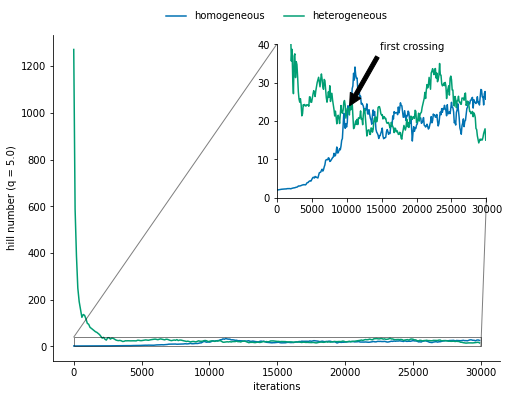

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use("seaborn-colorblind")

df = pd.DataFrame(simulator.earlystop.log)
df.index = df.index * poll_interval

df.plot(ax=ax)
ax.set(xlabel="iterations", ylabel=f"hill number (q = {diversity_order})")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

zoom = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
df.plot(ax=zoom, legend=False)
x1, x2, y1, y2 = 0, df.shape[0] * poll_interval, 0, 40
zoom.set_xlim(x1, x2)
zoom.set_ylim(y1, y2)

zoom.spines['right'].set_visible(False)
zoom.spines['top'].set_visible(False)

ax.indicate_inset_zoom(zoom, edgecolor="black")
ax.legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.1), frameon=False)

crossing = np.argmax(df["heterogeneous"] < df["homogeneous"]) * poll_interval
zoom.annotate('first crossing',
              xy=(crossing, df.loc[crossing, "heterogeneous"]), xycoords='data',
              xytext=(0.8, 0.95), textcoords='axes fraction',
              arrowprops=dict(facecolor='black', shrink=0.05),
              horizontalalignment='right', verticalalignment='bottom')